In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fake_job_postings.csv", on_bad_lines='skip')

In [ ]:
df.drop(['company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace=True)
#df

In [ ]:
from scipy.stats import skewnorm
import numpy as np

np.random.seed(42)

def generate_skewed_data(size, mean, std, skew):
    """Generate skewed synthetic data."""
    shape = skew  # Skew (positive = right skew, negative = left skew)
    scale = std
    loc = mean
    return skewnorm.rvs(shape, loc=loc, scale=scale, size=size)

skew_values = {
    "has_links_without_https": (0, 0),
    "Identity_details_asked": (1, -2),
    "average_days_between_interview_and_job_offer": (-1, 2.5),
}

df['has_links_without_https'] = 0
df['Identity_details_asked'] = 0
df['average_days_between_interview_and_job_offer'] = 0.0

df.loc[df['fraudulent'] == 0.0, 'has_links_without_https'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=0.2, std=0.1, skew=skew_values["has_links_without_https"][0]
).round().astype(int)

df.loc[df['fraudulent'] == 0.0, 'Identity_details_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=0.2, std=0.3, skew=skew_values["Identity_details_asked"][0]
).round().astype(int)

df.loc[df['fraudulent'] == 0.0, 'average_days_between_interview_and_job_offer'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=20, std=10, skew=skew_values["average_days_between_interview_and_job_offer"][0]
)

df.loc[df['fraudulent'] == 1.0, 'has_links_without_https'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=0.4, std=0.4, skew=skew_values["has_links_without_https"][1]
).round().astype(int)

df.loc[df['fraudulent'] == 1.0, 'Identity_details_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=0.7, std=0.4, skew=skew_values["Identity_details_asked"][1]
).round().astype(int)

df.loc[df['fraudulent'] == 1.0, 'average_days_between_interview_and_job_offer'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=3, std=2.8, skew=skew_values["average_days_between_interview_and_job_offer"][1]
)

df['has_links_without_https'] = df['has_links_without_https'].clip(0, 1)
df['Identity_details_asked'] = df['Identity_details_asked'].clip(0, 1)


#print(df[['fraudulent', 'has_links_without_https', 'Identity_details_asked',  'average_days_between_interview_and_job_offer']].describe())
#df.head()


In [ ]:
# Define skew values
skew_values.update({
    "avg_no_of_time_sensitive_details": (0.12, 0.1),
    "avg_no_of_baity_phrases": (-0.7, 0.3)
})

df['avg_no_of_time_sensitive_details'] = 0.0
df['avg_no_of_baity_phrases'] = 0.0

# Generate and assign values for non-fraudulent (0.0)
df.loc[df['fraudulent'] == 0.0, 'avg_no_of_time_sensitive_details'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=3.2, std=2, skew=skew_values["avg_no_of_time_sensitive_details"][0]
)

df.loc[df['fraudulent'] == 0.0, 'avg_no_of_baity_phrases'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=1.9, std=1.9, skew=skew_values["avg_no_of_baity_phrases"][0]
)

# Generate and assign values for fraudulent (1.0)
df.loc[df['fraudulent'] == 1.0, 'avg_no_of_time_sensitive_details'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=3, std=2, skew=skew_values["avg_no_of_time_sensitive_details"][1]
)

df.loc[df['fraudulent'] == 1.0, 'avg_no_of_baity_phrases'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=2.1, std=2.1, skew=skew_values["avg_no_of_baity_phrases"][1]
)

df['avg_no_of_time_sensitive_details'] = df['avg_no_of_time_sensitive_details'].clip(0)
df['avg_no_of_baity_phrases'] = df['avg_no_of_baity_phrases'].clip(0)

#print(df[['fraudulent', 'avg_no_of_time_sensitive_details', 'avg_no_of_baity_phrases']].describe())


In [ ]:
import numpy as np

# Set noise percentage
noise_percentage = 0.02

num_samples = len(df)
noise_indices = np.random.choice(df.index, size=int(num_samples * noise_percentage), replace=False)

# Flip 'fraudulent' labels (0 -> 1 or 1 -> 0)
df.loc[noise_indices, 'fraudulent'] = 1 - df.loc[noise_indices, 'fraudulent']

feature_columns = ['has_links_without_https', 'Identity_details_asked', 'average_days_between_interview_and_job_offer', 'avg_no_of_baity_phrases', 'avg_no_of_time_sensitive_details']

for column in feature_columns:
    noise = np.random.normal(0, 0.3, size=num_samples)  # Normal noise with mean 0 and small std dev
    df[column] += noise  # Add noise to the feature

    nan_indices = np.random.choice(df.index, size=int(num_samples * 0.005), replace=False)
    df.loc[nan_indices, column] = np.nan

df['has_links_without_https'] = df['has_links_without_https'].clip(0, 1)
df['Identity_details_asked'] = df['Identity_details_asked'].clip(0, 1)

df['average_days_between_interview_and_job_offer'] = df['average_days_between_interview_and_job_offer'].clip(0)

#print(df[['fraudulent', 'has_links_without_https', 'Identity_details_asked', 'average_days_between_interview_and_job_offer']].describe())


In [ ]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    filtered_df_f = df.loc[df['fraudulent'] == 0.0]
    filtered_df_t = df.loc[df['fraudulent'] == 1.0]

    value_counts_f = (
        filtered_df_f[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()
    )

    value_counts_t = (
        filtered_df_t[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()
    )

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))

    value_counts_f.plot(kind='bar', ax=axes[0], color='b', alpha=0.5)
    axes[0].set_title('Non-Fraudulent Cases')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel(feature)

    value_counts_t.plot(kind='bar', ax=axes[1], color='r', alpha=0.6)
    axes[1].set_title('Fraudulent Cases')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


In [ ]:
#compare_plot_fraudulent_and_nonfraudulent_class(df, 'average_days_between_interview_and_job_offer')

In [ ]:
#compare_plot_fraudulent_and_nonfraudulent_class(df,'has_links_without_https')


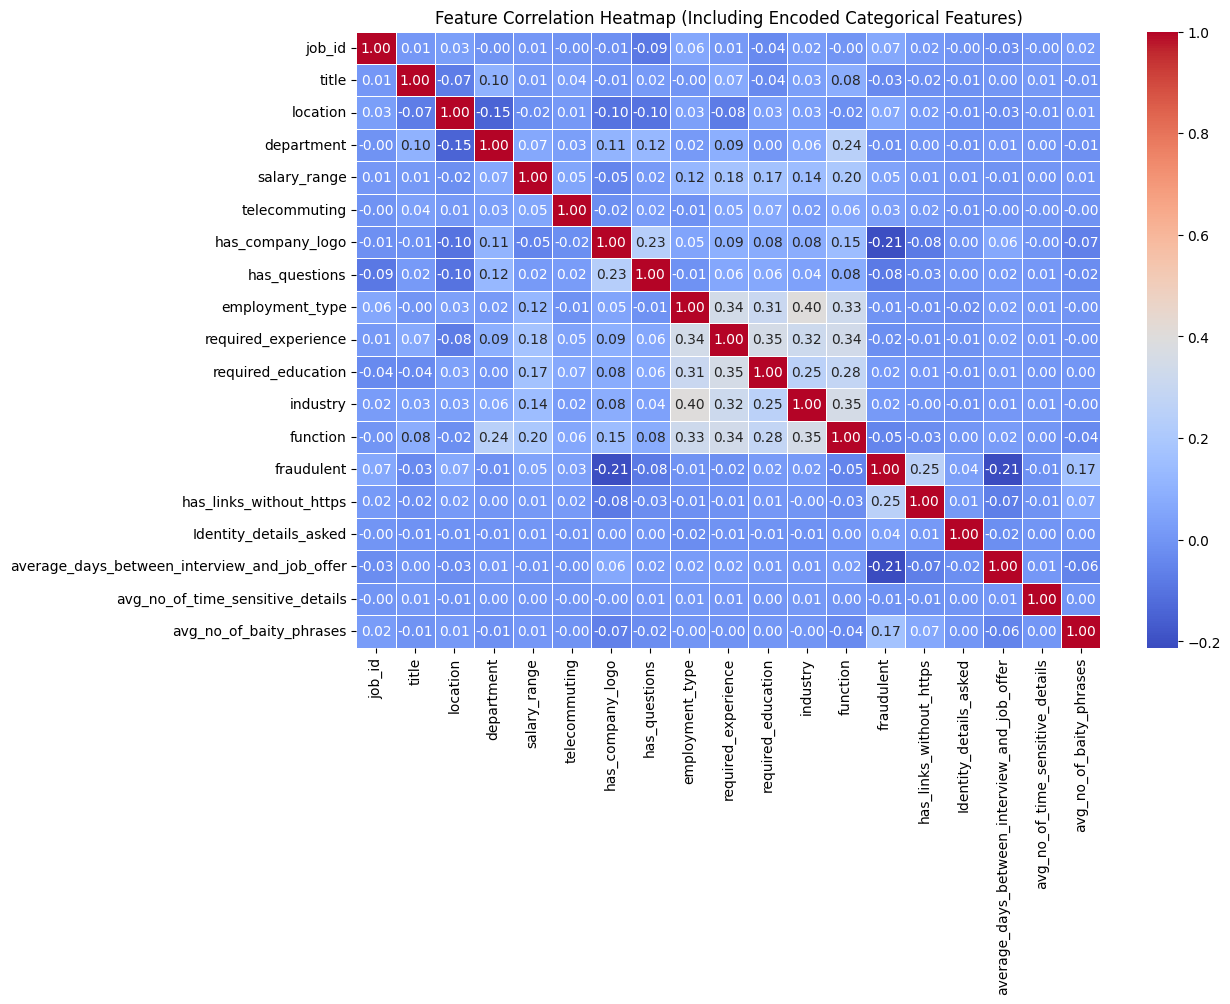

In [ ]:
import seaborn as sns

df_encoded = df.copy()

for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()


In [ ]:
df.rename(columns={'fraudulent': 'is_scam'}, inplace=True)
df.to_csv('email_job_scam.csv', index=False)


In [ ]:
print(len(df))
print(df.isnull().sum())


17880
job_id                                              0
title                                               0
location                                          346
department                                      11547
salary_range                                    15012
telecommuting                                       0
has_company_logo                                    0
has_questions                                       0
employment_type                                  3471
required_experience                              7050
required_education                               8105
industry                                         4903
function                                         6455
is_scam                                             0
has_links_without_https                            89
Identity_details_asked                             89
average_days_between_interview_and_job_offer       89
avg_no_of_time_sensitive_details                   89
avg_no_of_baity_phrase

In [ ]:
print('Percent of Null Values in Each Column:\n')
print(df.isnull().mean() * 100)

Percent of Null Values in Each Column:

job_id                                           0.000000
title                                            0.000000
location                                         1.935123
department                                      64.580537
salary_range                                    83.959732
telecommuting                                    0.000000
has_company_logo                                 0.000000
has_questions                                    0.000000
employment_type                                 19.412752
required_experience                             39.429530
required_education                              45.329978
industry                                        27.421700
function                                        36.101790
is_scam                                          0.000000
has_links_without_https                          0.497763
Identity_details_asked                           0.497763
average_days_between_interview_a

In [ ]:
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')
df['salary_range'] = df['salary_range'].fillna('Not Specified')
df['employment_type'] = df['employment_type'].fillna('Not Specified')
df['required_experience'] = df['required_experience'].fillna('Not Specified')
df['required_education'] = df['required_education'].fillna('Not Specified')
df['industry'] = df['industry'].fillna('Not Specified')
df['function'] = df['function'].fillna('Not Specified')


In [ ]:
print("Fraudulent Value Counts:")
print(df['is_scam'].value_counts())

Fraudulent Value Counts:
is_scam
0    16709
1     1171
Name: count, dtype: int64


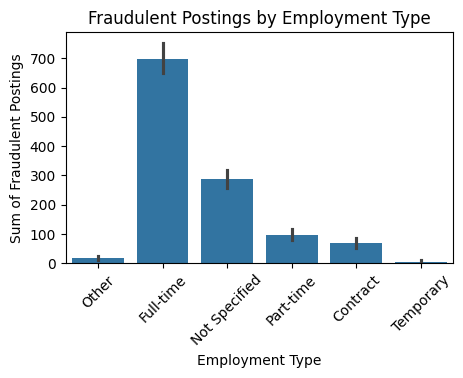

In [ ]:
# Bar plot for employment_type
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='employment_type', y='is_scam', estimator=sum)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

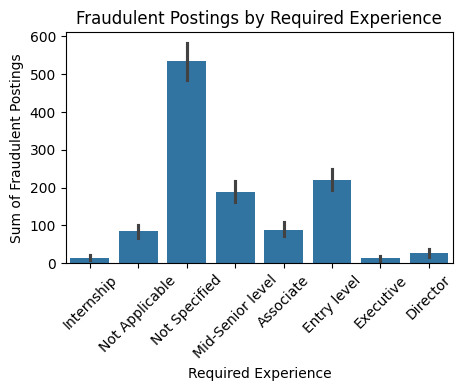

In [ ]:
# Bar plot for required_experience
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='required_experience', y='is_scam', estimator=sum)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

knn_features = [
    'has_links_without_https',
    'Identity_details_asked',
    'average_days_between_interview_and_job_offer',
    'avg_no_of_time_sensitive_details',
    'avg_no_of_baity_phrases'
]

numeric_cols = df.select_dtypes(include='number').columns.tolist()
other_features = list(set(numeric_cols) - set(knn_features))

impute_df = df[knn_features + other_features].copy()
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # You can tune this (3–10 often works well)
imputed_array = imputer.fit_transform(impute_df)

imputed_df = pd.DataFrame(imputed_array, columns=impute_df.columns)

for col in knn_features:
    df[col] = imputed_df[col]

df['has_links_without_https'] = df['has_links_without_https'].round()
df['Identity_details_asked'] = df['Identity_details_asked'].round()


In [ ]:
print(df.isnull().mean() * 100)

job_id                                          0.0
title                                           0.0
location                                        0.0
department                                      0.0
salary_range                                    0.0
telecommuting                                   0.0
has_company_logo                                0.0
has_questions                                   0.0
employment_type                                 0.0
required_experience                             0.0
required_education                              0.0
industry                                        0.0
function                                        0.0
is_scam                                         0.0
has_links_without_https                         0.0
Identity_details_asked                          0.0
average_days_between_interview_and_job_offer    0.0
avg_no_of_time_sensitive_details                0.0
avg_no_of_baity_phrases                         0.0
dtype: float

In [ ]:
df.to_csv('email_job_scam_cleaned.csv', index=False)